In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os

In [ ]:
ROOT = '/content/drive/MyDrive/Regression_ANN'

In [ ]:
os.chdir(ROOT)

In [ ]:
!pwd

/content/drive/MyDrive/Regression_ANN


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
housing = fetch_california_housing()

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns = housing['feature_names'])

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y = pd.DataFrame(housing.target, columns = ['target'])

In [ ]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
X.shape

(20640, 8)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,random_state=42)

In [ ]:
X_train_full.shape

(15480, 8)

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)


(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [ ]:
LAYERS = [
        tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
        tf.keras.layers.Dense(10, activation = "relu"),
        tf.keras.layers.Dense(5, activation = "relu"),
        tf.keras.layers.Dense(1)
]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)

In [ ]:
#for calculating accuracy score (r2 score)
#from keras import backend as k

def coeff_determination(y_true,y_pred):
  from keras import backend as K
  SS_res = K.sum(K.square(y_true-y_pred))
  SS_tot = K.sum(K.square(y_true- K.mean(y_true)))
  return(1-SS_res/(SS_tot+K.epsilon()))

In [ ]:
LOSS ='mse'
OPTIMIZER = 'sgd'

model.compile(optimizer = OPTIMIZER, loss = LOSS, metrics = [coeff_determination])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
EPOCHS = 10
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 0.6552 - coeff_determination: 0.4824 - val_loss: 0.4119 - val_coeff_determination: 0.6615
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4061 - coeff_determination: 0.6789 - val_loss: 0.4006 - val_coeff_determination: 0.6640
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3822 - coeff_determination: 0.6937 - val_loss: 0.3919 - val_coeff_determination: 0.6713
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3719 - coeff_determination: 0.7052 - val_loss: 0.3866 - val_coeff_determination: 0.6733
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3654 - coeff_determination: 0.7067 - val_loss: 0.4112 - val_coeff_determination: 0.6494
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3578 - coeff_determination: 0.7147 - val_loss: 0.7099 - val_coeff_determination: 0.3442
Epoch 7/10
363/3

In [ ]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,0.655159,0.482413,0.411867,0.661518
1,0.406080,0.678894,0.400572,0.664034
2,0.382154,0.693670,0.391913,0.671307
3,0.371856,0.705246,0.386569,0.673274
4,0.365357,0.706739,0.411247,0.649378
5,0.357754,0.714685,0.709893,0.344157
6,0.353406,0.719023,0.363095,0.694355
7,0.348232,0.723056,0.423484,0.636070
8,0.344919,0.721537,0.325213,0.731224
9,0.338909,0.727319,0.427490,0.627714


<Axes: >

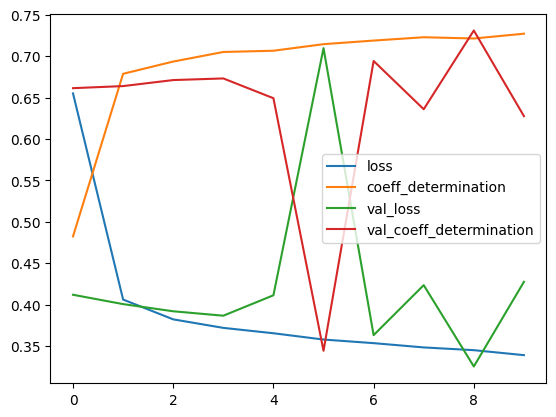

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3553 - coeff_determination: 0.7055


[0.35531020164489746, 0.7055296897888184]

In [ ]:
new = X_test[0]
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [ ]:
new.shape

(8,)

In [ ]:
new = new.reshape((1,8))

In [ ]:
model.predict(new)

1/1 [==============================] - 0s 151ms/step


array([[0.76649374]], dtype=float32)